# Exploratory Analysis and Visualization
## Exploratory Analysis
### Import data

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np

In [2]:
df = pd.read_csv("./Data/HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Trend Analysis

* Mean, Median, Quantile, Mode
* Standard deviation, Variance
* Skewness and kurtosis, Normal distribution (kurtosis = 3) and 3 important distributions
    * Chi-squared distribution: $ Q = \sum_{i=1}^{k}Z_i^2$
        * In statistics often used in hypothesis testing and confidence interval estimation, particularly within the context of **goodness-of-fit tests**, tests of **independence in contingency tables**, and **variance estimation in ANOVA**. 
        * Q is a Chi-squared distributed variable.
        * Z is a standard normal variable.
        * k is the degrees of freedom, corresponding to the number of $Z_i^2$ terms being summed.
    * t distribution: $t = Z/\frac{Q}{k}$
        *  It arises when **estimating the mean** of a normally distributed population in situations where the **sample size is small**, and the **population standard deviation is unknown**
        * Z is a standard normal variable.
        * Q is a Chi-squared variable with k degrees of freedom.
        * k is the degrees of freedom, usually n - 1 in the context of a sample of size n. 
    * F distribution: $F= \frac{Q_1/d_1}{Q_2/d_2}$
        * It is most commonly used in the **Analysis of Variance (ANOVA)**, especially for **comparing the ratio of two variances** to understand if they are significantly different.
        * $Q_1$ and $Q_2$ are independently chi-squared distributed variables with $d_1$ and $d_2$ degree of freedom, respectively.
        * F is and F-distributed variable with $d_1$ and $d_2$ degrees of freedom.
* Sampling
    * Error
        * Error in sampling with replacement: $u_x=\sqrt{\sigma^2/n}$
        * Error in sampling without replacement: $u_x=\sqrt{\frac{\sigma^2}{n} (\frac{N-n}{N-1})}$
        * N is population size, n is sample size
    * Sample Size
        * Proper Sample Size with replacement: $n=\frac{Z_{\alpha/2}{\sigma^2}}{E^2}$
            * $Z_{\alpha/2}$ is the z-score corresponding to the desired confidence level.
            * $\sigma$ is the standard deviation of the population.
            * E is the desired margin of error.
            * 95% confidence interval $\to$ 2 $\sigma$ from $\mu$
        * Example: You are conducting a survey to estimate the average height of adult males in a city. You want to be confident that your sample mean is close to the true population mean, so you decide to use the sample size formula to determine how many individuals you should include in your sample.
            * Desired Confidence Level: 95% 
            * Population Standard Deviation ($\sigma$): Assume it's 4 inches 
            * Margin of Error ($E$):  ±0.5 inches of the true mean
            * $n=\frac{Z_{\alpha/2}{\sigma^2}}{E^2} = (\frac{1.96 * 4}{0.5})^2=15.68^2=245.86$
        * Proper Sample Size without replacement: $\frac{N\frac{Z_{\alpha/2}^2*\sigma^2}{E^2}}{N+\frac{Z_{\alpha/2}^2*\sigma^2}{E^2}-1}$   
            * N is the population size (**It's important to know**)
            * $Z_{\alpha/2}$ is the z-score corresponding to the desired confidence level.
            * $\sigma$ is the standard deviation of the population.
            * E is the desired margin of error.
        * We do the same example but we already know there's 10,000 adult males in the city.
            * $n=\frac{N\frac{Z_{\alpha/2}^2*\sigma^2}{E^2}}{N+\frac{Z_{\alpha/2}^2*\sigma^2}{E^2}-1}= \frac{10000*\frac{1.96^2*4^2}{0.5^2}}{10000+\frac{1.96^2*4^2}{0.5^2}-1}=240$


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df["satisfaction_level"].skew(), df["satisfaction_level"].kurt()

(-0.4763603412839644, -0.6708586220574557)

MVSK: Mean, Variance, Skewness, Kurtosis. (Moments analysis)

In [5]:
ss.norm.stats(moments = "mvsk")

(0.0, 1.0, 0.0, 0.0)

### Distribution Analysis
* t distribution : `ss.t`
* Normal distribution : `ss.norm`
* Chi-squared distribution : `ss.chi2`
* F distribution : `ss.f`
* PDF (Probability Density Function) 
* PPF (Percent Point Function): inverse of the Cumulative Distribution Function (CDF)
* RVS (Random Variable Simulation)

In [6]:
ss.norm.pdf(0.0), ss.norm.ppf(0.9), ss.norm.cdf(1.96)

(0.3989422804014327, 1.2815515655446004, 0.9750021048517795)

In [7]:
ss.norm.rvs(size = 10)

array([-1.12758167,  0.61571217, -2.00672979, -0.42896313,  0.47855222,
        1.02556954, -1.53740147, -0.13296752, -0.34649074,  1.03586313])

### Sampling

In [8]:
df.sample(n = 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
9508,0.57,0.76,2,176,3,0,0,0,technical,low
3003,0.75,0.66,5,177,2,0,0,0,sales,low
10501,0.32,0.40,2,132,3,0,0,0,technical,low
4032,0.63,0.76,4,217,2,1,0,0,IT,medium
12722,0.44,0.47,2,130,3,0,1,0,technical,low
12685,0.79,0.84,4,240,5,0,1,0,sales,medium
4288,0.53,0.72,3,228,3,0,0,0,sales,medium
2255,0.87,0.74,4,190,4,0,0,0,technical,medium
14846,0.39,0.57,2,127,3,0,1,0,sales,low
10778,0.92,0.98,3,257,3,0,0,1,sales,medium


In [9]:
df.sample(frac=0.001)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14891,0.85,0.87,5,246,5,1,1,0,sales,medium
2153,0.80,0.83,3,163,3,0,0,0,sales,low
13064,0.58,0.38,4,203,5,0,0,0,sales,low
3405,0.69,0.96,3,210,3,0,0,0,support,low
2483,0.94,0.78,3,184,3,1,0,0,technical,medium
5456,0.56,0.68,3,269,3,1,0,0,technical,low
9596,0.79,0.55,5,242,2,0,0,0,support,low
12789,0.61,0.96,3,247,3,0,0,0,support,low
14654,0.81,0.98,5,245,5,0,1,0,IT,low
5068,0.76,0.50,4,245,3,0,0,0,hr,low


## Single Variable analysis
### Outlier Analysis
1. **Purpose**: Identify data points that are significantly different from the majority of the data. Outliers can skew and mislead the training process of machine learning models resulting in longer training times, less accurate models, and ultimately poorer results.
2. **Methods**: Box plots, scatter plots, Z-score, IQR method.

### Comparison Analysis
1. **Purpose**: Understand the variable's characteristics compared to other variables or its behavior across different subgroups within the dataset.
2. **Methods**: Descriptive statistics (mean, median, mode), visualizations like histograms or bar charts for categorical data.

### Structure Analysis
1. **Purpose**: Understand the type, category, and general composition of the data variable.
2. **Components:**
    * **Data Type Identification**: Recognizing if the variable is nominal, ordinal, interval, or ratio.
    * **Missing Values Identification**: Assessing the amount and pattern of missing data.
    * **Zero Variance Identification**: Detecting if the variable has a single constant value or limited variance, which might be uninformative for certain analyses.

### Distribution Analysis
1. **Purpose**:  Understand the distribution and frequency of data points.
2. **Methods**
    * **Graphical Representations**: Histograms, density plots, and Q-Q plots for visual inspection of distribution.
    * **Statistical Tests** ： Kolmogorov-Smirnov test, Shapiro-Wilk test for normality testing.
    * **Summary Statistics**: Skewness, kurtosis to understand the shape of distribution.

In [10]:
### Outlier analysis

sl_s = df["satisfaction_level"]
sl_s.isnull().sum()
df[df["satisfaction_level"].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [11]:
sl_s.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [12]:
sl_s.skew(),sl_s.kurt()

(-0.4763603412839644, -0.6708586220574557)

In [13]:
np.histogram(sl_s.values, bins= np.arange(0,1.1,0.1))

(array([ 195, 1214,  532,  974, 1668, 2146, 1972, 2074, 2220, 2004],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [14]:
### LastEvaluation Analysis

le_s = df["last_evaluation"]
le_s.isnull().sum()

0

In [15]:
le_s.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

In [16]:
np.histogram(le_s.values, bins= np.arange(0,1.1,0.1))

(array([   0,    0,    0,  179, 1389, 3395, 2234, 2062, 2752, 2988],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [17]:
### NumberProject Analysis

np_s = df["number_project"]
np_s[np_s.isnull()]

np_s.describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [18]:
np_s.skew(),np_s.kurt()

(0.3377056123598222, -0.4954779519008947)

In [19]:
np_s.value_counts(normalize=True).sort_index()

number_project
2    0.159211
3    0.270351
4    0.291019
5    0.184079
6    0.078272
7    0.017068
Name: proportion, dtype: float64

In [20]:
### AverageMonthlyHours Analysis
amh_s = df["average_montly_hours"]
amh_s.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [21]:
amh_s.skew(),amh_s.kurt()

(0.0528419894163242, -1.1349815681924558)

In [22]:
np.histogram(amh_s,bins= 10)

(array([ 367, 1240, 2733, 1722, 1628, 1712, 1906, 2240, 1127,  324],
       dtype=int64),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]))

In [23]:
amh_s.value_counts(bins=10).sort_index()

average_montly_hours
(95.785, 117.4]     367
(117.4, 138.8]     1240
(138.8, 160.2]     2733
(160.2, 181.6]     1722
(181.6, 203.0]     1700
(203.0, 224.4]     1640
(224.4, 245.8]     1906
(245.8, 267.2]     2240
(267.2, 288.6]     1127
(288.6, 310.0]      324
Name: count, dtype: int64

In [24]:
### TimeSpendCompany Analysis

tsc_s = df["time_spend_company"]
tsc_s.describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [25]:
tsc_s.value_counts().sort_index()

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: count, dtype: int64

In [26]:
### WorkAccident Analysis

wa_s = df["Work_accident"]
wa_s.describe()

count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64

In [27]:
wa_s.value_counts().sort_index()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [28]:
### Left Analysis

l_s = df["left"]
l_s.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [29]:
### PromotionLast5Years Analysis

pl5_s = df["promotion_last_5years"]
pl5_s.value_counts().sort_index()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [30]:
### Salary Analysis

s_s = df["salary"]
s_s.describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [31]:
s_s.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [32]:
df[s_s == "high"]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


In [33]:
### Department Analysis

d_s = df["Department"]
d_s.value_counts(normalize=True)

Department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

In [34]:
### Comparison Analysis

df = df.dropna(axis=0,how="any")
df.shape

(14999, 10)

In [35]:
df_num = df.select_dtypes(include=[np.number])
df_num["Department"] = df["Department"]
df_num.groupby("Department").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [36]:
df.loc[:,["last_evaluation","Department"]].groupby("Department").mean()

,last_evaluation
Department,
IT,0.716830
RandD,0.712122
accounting,0.717718
hr,0.708850
management,0.724000
marketing,0.715886
product_mng,0.714756
sales,0.709717
support,0.723109


In [37]:
df.loc[:,["time_spend_company","Department"]].groupby("Department")["time_spend_company"].apply(lambda x:x.max()-x.min())

Department
IT             8
RandD          6
accounting     8
hr             6
management     8
marketing      8
product_mng    8
sales          8
support        8
technical      8
Name: time_spend_company, dtype: int64

## Visualization
### Bar Plot

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

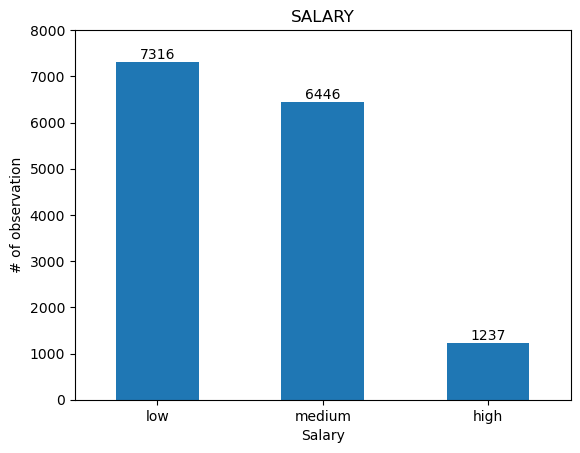

In [39]:
plt.title("SALARY")
plt.ylabel("# of observation")
plt.xlabel("Salary")
plt.axis([-0.5,2.5,0,8000])
plt.xticks(np.arange(len(df["salary"].value_counts())),df["salary"].value_counts().index)
plt.bar(np.arange(len(df["salary"].value_counts())),df["salary"].value_counts(),width=0.5)
for x,y in zip(np.arange(len(df["salary"].value_counts())),df["salary"].value_counts()):
    plt.text(x,y,y,ha = "center",va = "bottom")
plt.show()

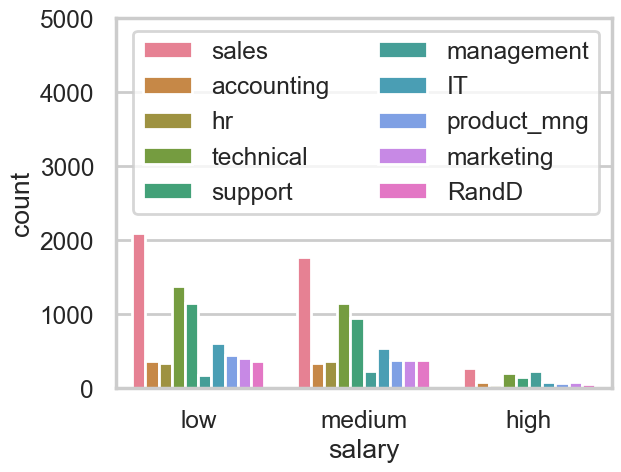

In [40]:
sns.set_style(style="whitegrid")
sns.set_context(context="poster",font_scale=0.8)
sns.set_palette("summer")
ax = sns.countplot(x="salary",hue="Department",data=df)
ax.set_ylim(0,5000)
plt.legend(loc='upper right',ncol = 2)  # You can use other options like 'upper right', 'lower left', etc.
plt.show()

### Histogram

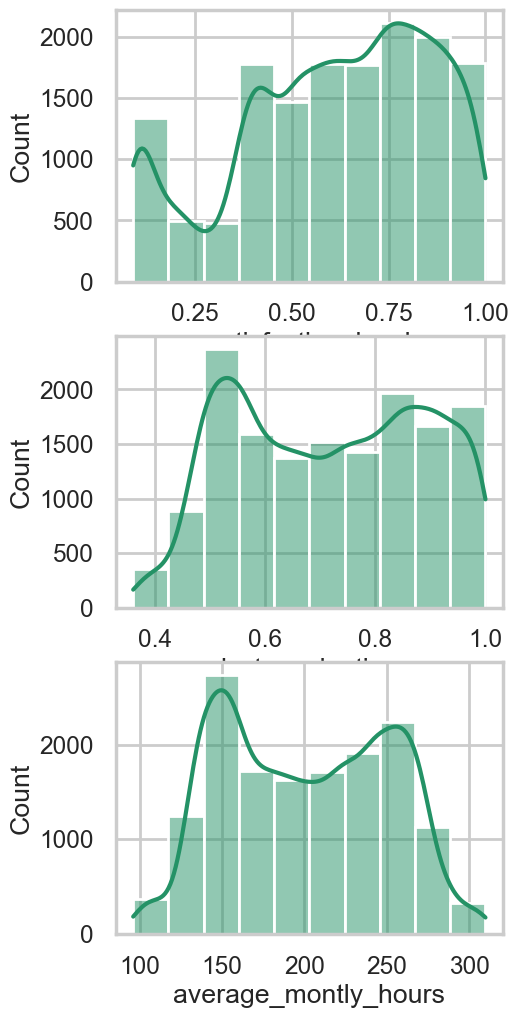

In [41]:
f = plt.figure(figsize=(5,12))
f.add_subplot(3,1,1)
sns.histplot(df["satisfaction_level"],bins = 10,kde=True)
f.add_subplot(3,1,2)
sns.histplot(df["last_evaluation"],bins = 10,kde=True)
f.add_subplot(3,1,3)
sns.histplot(df["average_montly_hours"],bins = 10,kde=True)
plt.show()

### Boxplot

<Axes: xlabel='time_spend_company'>

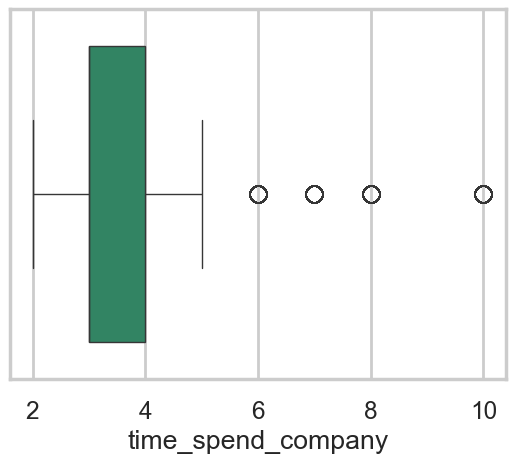

In [42]:
sns.boxplot(x = df["time_spend_company"])

<Axes: ylabel='time_spend_company'>

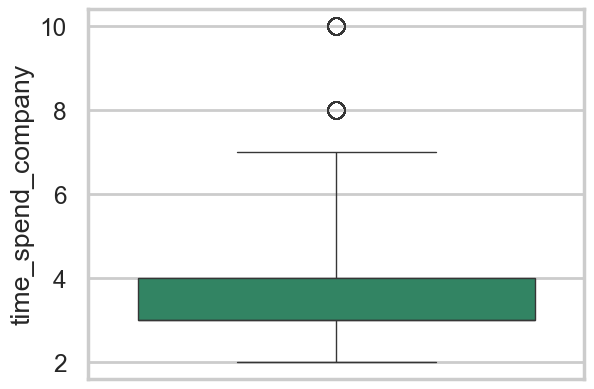

In [43]:
sns.boxplot(df["time_spend_company"],whis=3,saturation=0.75)

### Line Plot

In [44]:
sub_df = df[["time_spend_company","left"]].groupby("time_spend_company").mean()
sub_df

,left
time_spend_company,
2,0.016338
3,0.246159
4,0.348064
5,0.565513
6,0.291086
7,0.000000
8,0.000000
10,0.000000


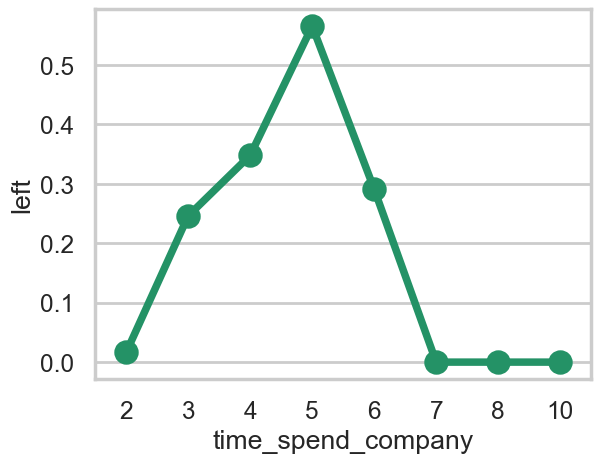

In [45]:
sns.pointplot(x = sub_df.index, y = sub_df["left"])
plt.show()

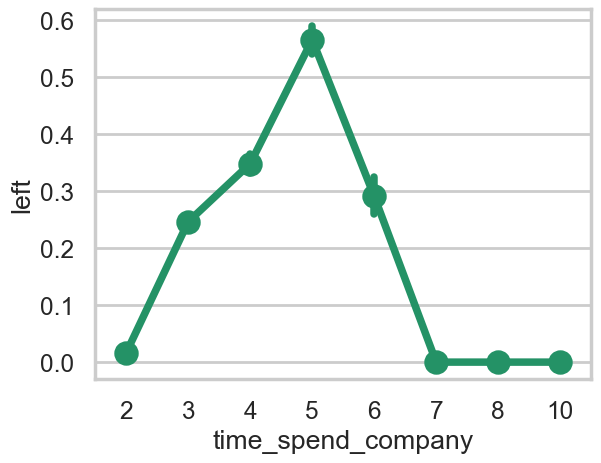

In [46]:
sns.pointplot(x = df["time_spend_company"], y = df["left"])
plt.show()

### Pie Chart

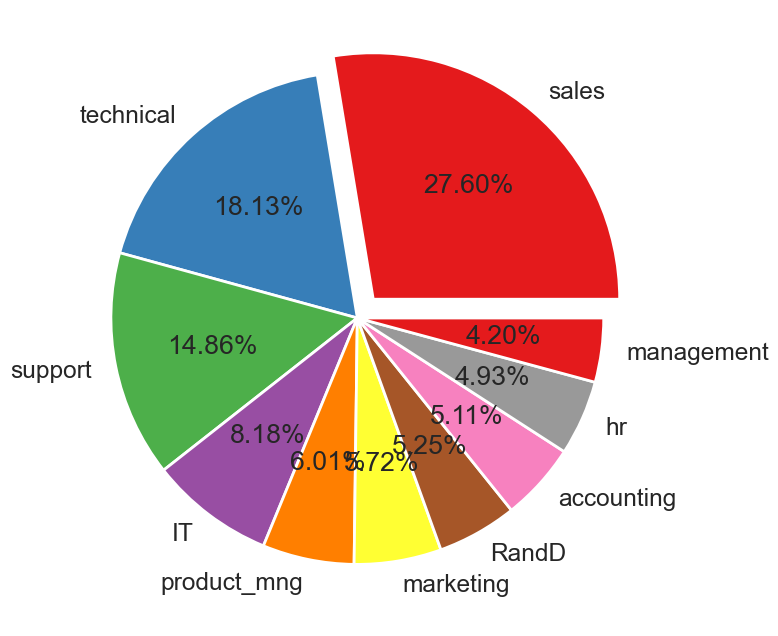

In [47]:
sns.set_palette("Set1")
plt.figure(figsize=(8,8))
plt.pie(df["Department"].value_counts(normalize = True),
        explode = [0.1 if i == "sales" else 0 for i in df["Department"].value_counts().index],
        labels= df["Department"].value_counts().index,
        autopct = "%1.2f%%")
plt.show()